<div style="background-color: lightblue; padding: 60px;">
    <h1><b>Continuous Probabilistic Methods</b></h1>
</div>


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Part I

### 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [ ]:
#calculate outliers based on IQR at a k=1.5 

def get_fences(col, k=1.5):
    """
    Calculate the lower and upper fences (bounds) for outliers in a DataFrame column.

    Parameters:
    - col: Name of the column in the DataFrame for which to calculate the fences.
    - k: Multiplier used to determine the range of the fences (default is 1.5).

    Returns:
    - lower_fence: The lower fence (bound) for identifying outliers.
    - upper_fence: The upper fence (bound) for identifying outliers.

    Calculates the lower and upper fences (bounds) for identifying outliers in a DataFrame column
    based on the interquartile range (IQR) and a multiplier 'k'. By default, 'k' is set to 1.5,
    but you can adjust it to change the sensitivity to outliers.

    The lower fence is calculated as Q1 - (k * IQR), and the upper fence is calculated as Q3 + (k * IQR),
    where Q1 is the first quartile (25th percentile), Q3 is the third quartile (75th percentile), and IQR
    is the interquartile range.

    Example usage:
    lower, upper = get_fences("column_name")
    print(f"Lower Fence: {lower}, Upper Fence: {upper}")
    """
    # Calculate the first quartile (Q1) and third quartile (Q3)
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Calculate the lower and upper fences (bounds)
    lower_fence = q1 - (k * iqr)
    upper_fence = q3 + (k * iqr)
    
    return lower_fence, upper_fence


# Part II

# Exercises

### 1. Using lemonade.csv dataset and focusing on continuous variables:



In [46]:
# URL of the CSV file
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

# Read the CSV data from the URL into a DataFrame
lemonade_df = pd.read_csv(url)

# Display the first few rows of the DataFrame to verify the data
lemonade_df.head()


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [42]:
lemonade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [45]:
lemonade_df.tail()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13
364,12/31/17,Sunday,15.1,2.50,9,0.5,7


In [ ]:
# based on the head and tail of this dataframe
# and the fact that it has 365 rows,
# it appears to be a full years worth of data

In [ ]:
# establish a datetime index

In [49]:
# convert the date to a datetime
lemonade_df.loc[:,'Date'] = pd.to_datetime(lemonade_df.Date)

/var/folders/hc/k8h5rkb97cx0qgd8n8r5rr9r0000gn/T/ipykernel_24170/1523736894.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  lemonade_df.loc[:,'Date'] = pd.to_datetime(lemonade_df.Date)


In [54]:
# reassign the index
lemonade_df = lemonade_df.set_index('Date')

In [55]:
lemonade_df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [59]:
lemonade_df.columns

Index(['Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [60]:
# To get some info on seaonality with
# this data set that follows a year,
# lets make a new column that follows the month
lemonade_df['month'] = lemonade_df.index.month_name()

In [ ]:
# To know *how* something is weird, 
# its good to have a baseline that is relative
# to the stuff around it, which means that 
# something like a month aggregate may be useful

In [61]:
lemonade_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Rainfall     365 non-null    float64
 3   Flyers       365 non-null    int64  
 4   Price        365 non-null    float64
 5   Sales        365 non-null    int64  
 6   month        365 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 22.8+ KB


In [62]:
lemonade_df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [ ]:
# off the cuff just from looking at the .describe():
# very high temperature that would not be survivable (lemonade on mars??)
# negative flyer value (taking paper from people???)

Spread of data for Temperature


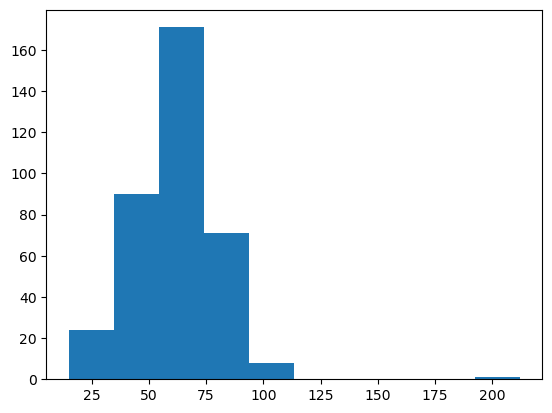

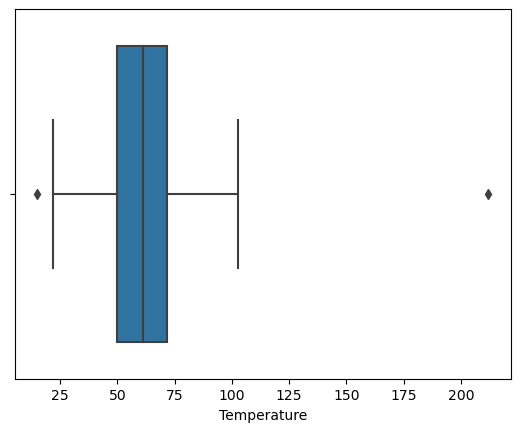

Spread of data for Rainfall


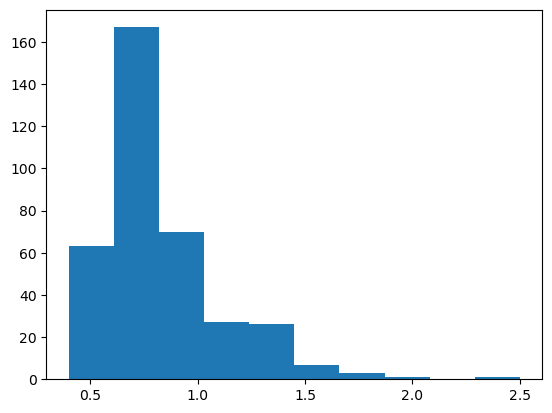

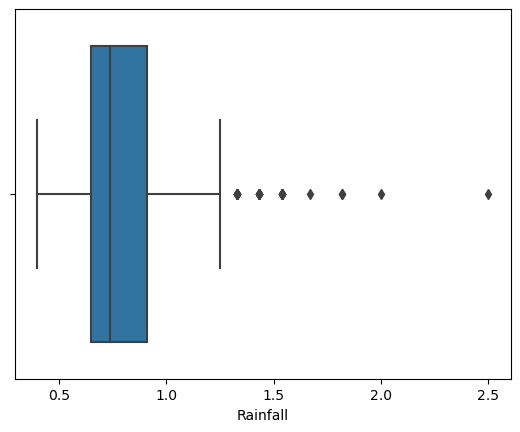

Spread of data for Flyers


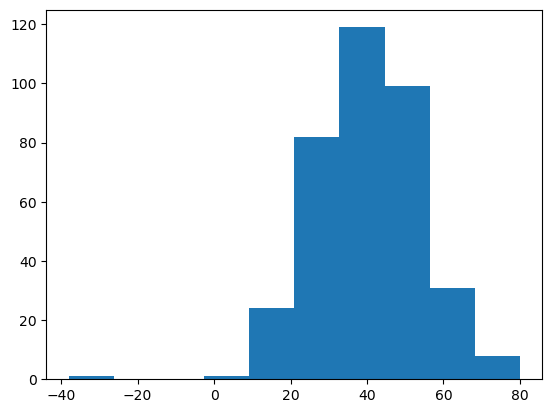

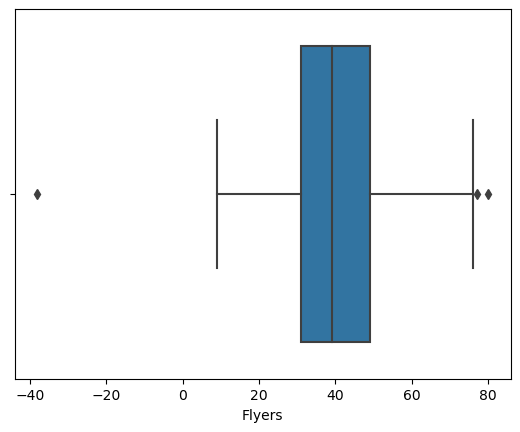

Spread of data for Price


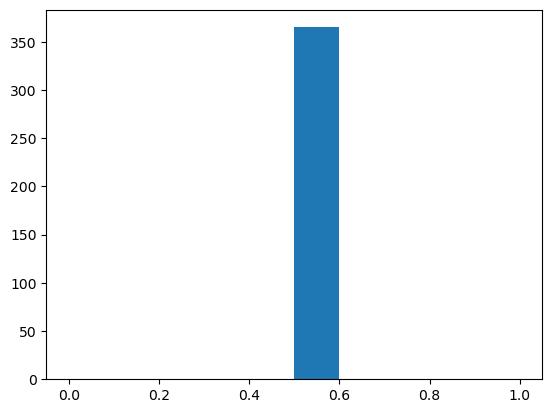

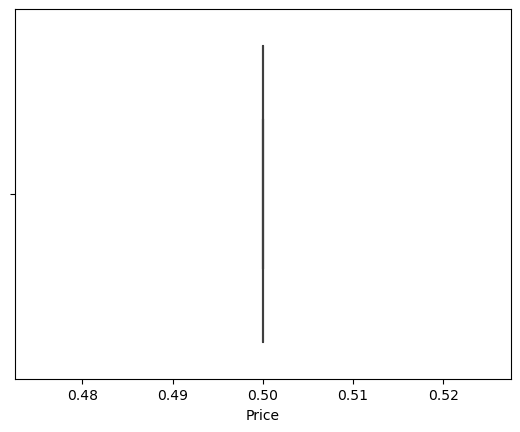

Spread of data for Sales


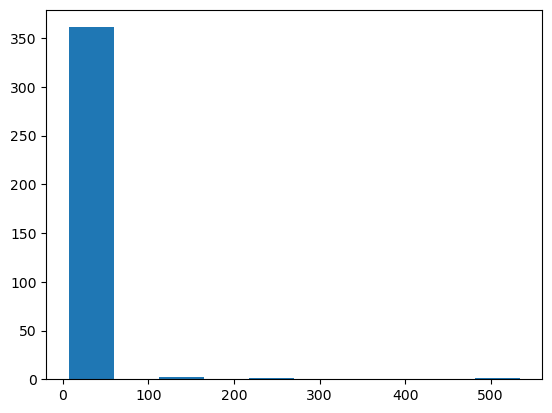

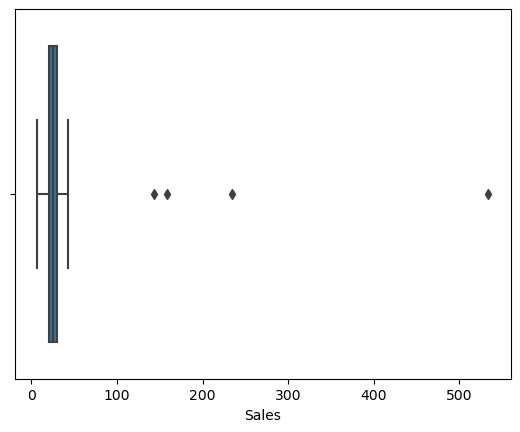

In [64]:
# first steps as per usual:
# plot the spread of information:
# Exclude the object type columns: df.drop(columns=['month','Day']).columns
for col in lemonade_df.drop(columns=['month','Day']).columns:
    print(f'Spread of data for {col}')
    # make a histogram for each col
    plt.hist(lemonade_df[col])
    plt.show()
    # make a box plot of each col
    sns.boxplot(data=lemonade_df, x=col)
    plt.show()
    print('===========')

In [ ]:
# beyond what we saw in the initial investigation via 
# descriptive stats in df.describe():
# things that are noted and want to investigate 
# further:
#  - sales are *very* right skewed, are these real values?
#  - What do those sales values mean for us if they are real?
# - Is there a rainy season or is there something else
# going on with the outliers for that feature?
#  is there anything else beyond the exceptionally high
# and low values in temp and flyers that we neeed
# to check out?

In [ ]:
#calculate outliers based on IQR at a k=1.5 and k=3.0
# use the function defined earlier, get_fences

In [86]:
# lets pop all the values into a dictionary
# for organizational purposes
outliers_dict = {}
for col in lemonade_df.drop(columns=['month','Day']).columns:
    outliers_dict[col] = {}
    outliers_dict[col]['bounds'] = get_fences(lemonade_df,col)
    outliers_dict[col]['lemonade_df'] = \
    lemonade_df[(lemonade_df[col] > outliers_dict[col]['bounds'][1])|
      (lemonade_df[col] < outliers_dict[col]['bounds'][0])]

In [87]:
outliers_dict.keys()

dict_keys(['Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'])

In [88]:
lemonade_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2017-01-01 to 2017-12-31
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Day          365 non-null    object 
 1   Temperature  365 non-null    float64
 2   Rainfall     365 non-null    float64
 3   Flyers       365 non-null    int64  
 4   Price        365 non-null    float64
 5   Sales        365 non-null    int64  
 6   month        365 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 22.8+ KB


In [89]:
outliers_dict['Temperature']['lemonade_df']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-12-31,Sunday,15.1,2.50,9,0.5,7,December


In [90]:
outliers_dict['Temperature']['bounds']


(16.700000000000003, 104.7)

In [92]:
# Iterate through the columns in the outliers_dict

for col in outliers_dict.keys():
    print(f'Outliers for {col}:')
    print(outliers_dict[col]['lemonade_df'].to_markdown())
    print(f"Bounds: {outliers_dict[col]['bounds']}")
    print('=====================')
          

Outliers for Temperature:
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 | February |
| 2017-12-31 00:00:00 | Sunday   |          15.1 |       2.5  |        9 |     0.5 |       7 | December |
Bounds: (16.700000000000003, 104.7)
Outliers for Rainfall:
| Date                | Day       |   Temperature |   Rainfall |   Flyers |   Price |   Sales | month    |
|:--------------------|:----------|--------------:|-----------:|---------:|--------:|--------:|:---------|
| 2017-01-01 00:00:00 | Sunday    |          27   |       2    |       15 |     0.5 |      10 | January  |
| 2017-01-02 00:00:00 | Monday    |          28.9 |       1.33 |       15 |     0.5 |      13 | January  |
| 2017-01-03 00:00:00 | Tuesday   |          34.5 |       1.33 

In [ ]:
#takeaways from 1.5 IQR examination:
# high sales numbers are all in July, with the highest spike at July 4th 
# (independence day holiday)
# Rainy days all appear to be in December and January, appears to be a consistently rainy season
# low temp in winter as an outlier on new years, check to see weather
# around that date
# feb still probably not getting to 212
# check flyer date with negative value, see if we can fix that.

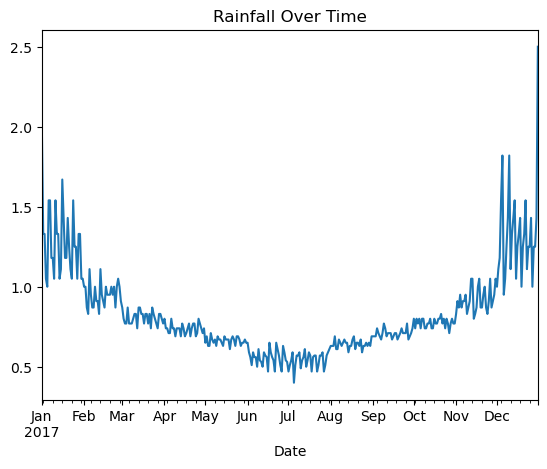

In [94]:
lemonade_df['Rainfall'].plot(title='Rainfall Over Time')
plt.show()

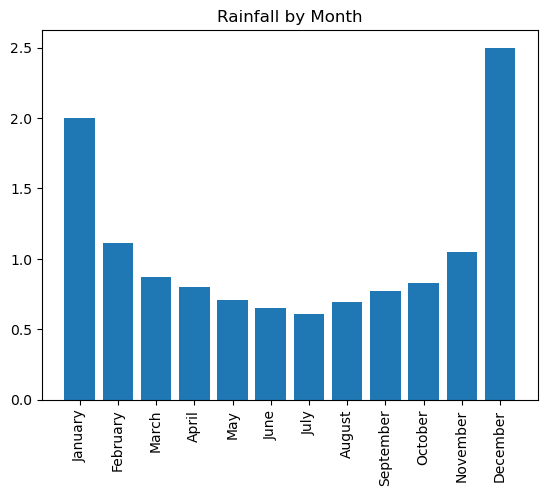

In [95]:
plt.bar(lemonade_df.month, lemonade_df.Rainfall)
plt.title('Rainfall by Month')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# I think rainfall checks out, rainy season consistent
# could be verified by behavior of other years if available

In [96]:
# lets pop all the values into a dictionary
# for organizational purposes
outliers_dict_3 = {}
for col in lemonade_df.drop(columns=['month','Day']).columns:
    outliers_dict_3[col] = {}
    outliers_dict_3[col]['bounds'] = get_fences(lemonade_df,col,k=3.0)
    outliers_dict_3[col]['lemonade_df'] = \
    df[(df[col] > outliers_dict_3[col]['bounds'][1])|
      (df[col] < outliers_dict_3[col]['bounds'][0])]

In [97]:

for col in outliers_dict_3.keys():
    print(f'Outliers for {col}:')
    print(outliers_dict_3[col]['lemonade_df'].to_markdown())
    print(f"Bounds: {outliers_dict_3[col]['bounds']}")
    print('=====================')

Outliers for Temperature:
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 |
Bounds: (-16.299999999999997, 137.7)
Outliers for Rainfall:
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 |
| 2017-12-05 00:00:00 | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 |
| 2017-12-10 00:00:00 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 |
| 2017-12-31 00:00:00 | Sunday  |          15.1 |       2.5  |        9 |     0.5 |       7 |
Bounds: (-0.13, 1.69)
Outliers for Flyers:
| Date                

In [ ]:
#  z scores:

In [98]:
outliers_dict['Rainfall'].keys()

dict_keys(['bounds', 'lemonade_df'])

In [99]:
col = 'Rainfall'
for col in outliers_dict.keys():
    outliers_dict[col]['zdf'] = \
    df[((df[col] - (df[col].mean())) / df[col].std()).abs() > 3] 


In [100]:
outliers_dict['Rainfall'].keys()


dict_keys(['bounds', 'lemonade_df', 'zdf'])

In [101]:
for col in outliers_dict.keys():
    print(f'For {col}:')
    print(outliers_dict[col]['zdf'].to_markdown())
    print('===========')

For Temperature:
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-02-11 00:00:00 | Saturday |           212 |       0.91 |       35 |     0.5 |      21 |
For Rainfall:
| Date                | Day     |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:--------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-01-01 00:00:00 | Sunday  |          27   |       2    |       15 |     0.5 |      10 |
| 2017-01-16 00:00:00 | Monday  |          30.6 |       1.67 |       24 |     0.5 |      12 |
| 2017-12-05 00:00:00 | Tuesday |          22   |       1.82 |       11 |     0.5 |      10 |
| 2017-12-10 00:00:00 | Sunday  |          31.3 |       1.82 |       15 |     0.5 |      11 |
| 2017-12-31 00:00:00 | Sunday  |          15.1 |       2.5  |        9 |     0.5 |       7 |
For Flyers:
| Date        

In [102]:
col = 'Rainfall'
for col in outliers_dict.keys():
    outliers_dict[col]['zdf'] = \
    df[((df[col] - (df[col].mean())) / df[col].std()).abs() > 2] 

In [103]:
for col in outliers_dict.keys():
    print(f'For {col}:')
    print(outliers_dict[col]['zdf'].to_markdown())
    print('===========')


For Temperature:
| Date                | Day      |   Temperature |   Rainfall |   Flyers |   Price |   Sales |
|:--------------------|:---------|--------------:|-----------:|---------:|--------:|--------:|
| 2017-02-11 00:00:00 | Saturday |         212   |       0.91 |       35 |     0.5 |      21 |
| 2017-06-16 00:00:00 | Friday   |          99.3 |       0.47 |       77 |     0.5 |      41 |
| 2017-06-26 00:00:00 | Monday   |         102.6 |       0.47 |       60 |     0.5 |      42 |
| 2017-07-01 00:00:00 | Saturday |         102.9 |       0.47 |       59 |     0.5 |     143 |
| 2017-07-10 00:00:00 | Monday   |          98   |       0.49 |       66 |     0.5 |      40 |
| 2017-07-18 00:00:00 | Tuesday  |          99.3 |       0.47 |       76 |     0.5 |      41 |
| 2017-07-22 00:00:00 | Saturday |          99.6 |       0.47 |       49 |     0.5 |      42 |
| 2017-07-27 00:00:00 | Thursday |          97.9 |       0.47 |       74 |     0.5 |      43 |
| 2017-12-05 00:00:00 | Tuesday  

In [ ]:
# everything appears to be consistent with our
# initial examination.  let's see what to do about
# those weird values:

In [104]:
# temp around 12-31:
lemonade_df.loc['2017-12-24':'2017-12-31']['Temperature']

Date
2017-12-24    35.8
2017-12-25    35.5
2017-12-26    28.9
2017-12-27    42.7
2017-12-28    37.8
2017-12-29    39.5
2017-12-30    30.9
2017-12-31    15.1
Name: Temperature, dtype: float64

In [105]:
# that seems just like a cold day.
# negative flyer day?
# 11-21
# lets look at the few days around there:
lemonade_df.loc['2017-11-20':'2017-11-23']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-11-20,Monday,55.6,0.87,41,0.5,22,November
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20,November
2017-11-22,Wednesday,48.7,1.00,40,0.5,19,November
2017-11-23,Thursday,51.9,0.87,47,0.5,23,November


In [107]:
# appears to be a clerical error.
# lets just make that value positive.
lemonade_df.loc[:,'Flyers'] = lemonade_df.Flyers.abs()

In [108]:

lemonade_df.Flyers.describe()


count    365.000000
mean      40.312329
std       13.163427
min        9.000000
25%       31.000000
50%       39.000000
75%       49.000000
max       80.000000
Name: Flyers, dtype: float64

In [109]:
# check out temperatures aroune feb 11th for that weird one:
lemonade_df.loc['2017-02-08':'2017-02-13']

,Day,Temperature,Rainfall,Flyers,Price,Sales,month
Date,,,,,,,
2017-02-08,Wednesday,52.6,0.87,31,0.5,22,February
2017-02-09,Thursday,42.7,1.00,39,0.5,19,February
2017-02-10,Friday,50.0,0.91,40,0.5,20,February
2017-02-11,Saturday,212.0,0.91,35,0.5,21,February
2017-02-12,Sunday,55.6,0.83,41,0.5,22,February
2017-02-13,Monday,46.4,1.11,34,0.5,18,February


In [111]:
# reassign the temp value for 02/11 for temperature
# to the mean of the day before and the day after
lemonade_df.loc['2017-02-11','Temperature'] = (lemonade_df.loc['2017-02-10']['Temperature'] + lemonade_df.loc['2017-02-12']['Temperature']) / 2


Spread of data for Temperature


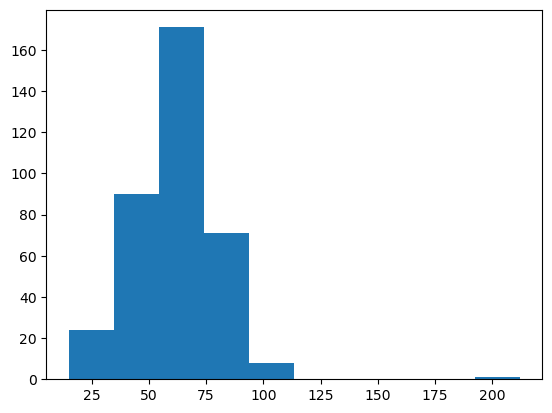

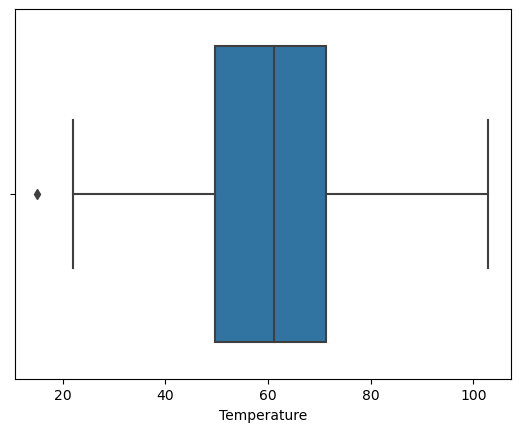

Spread of data for Rainfall


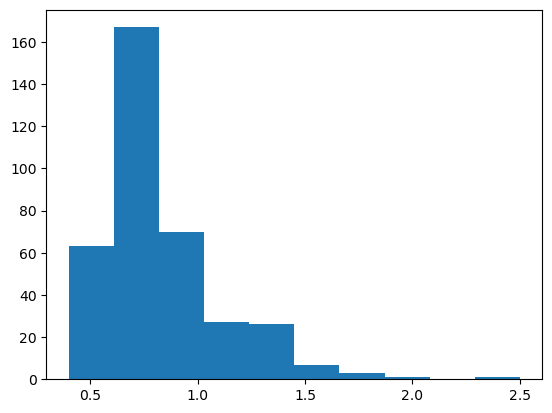

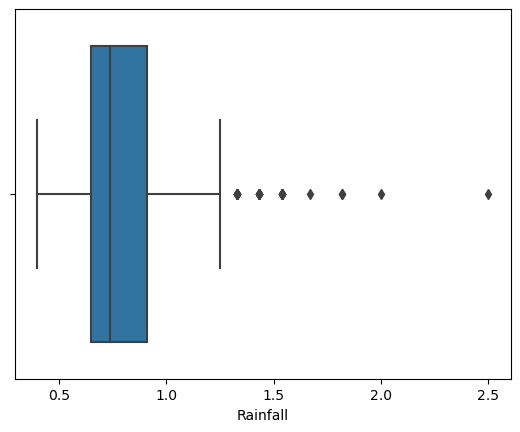

Spread of data for Flyers


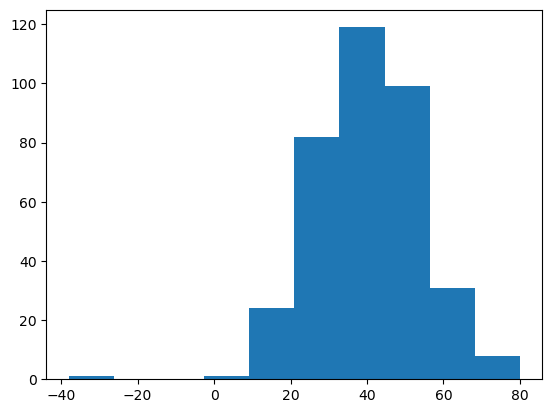

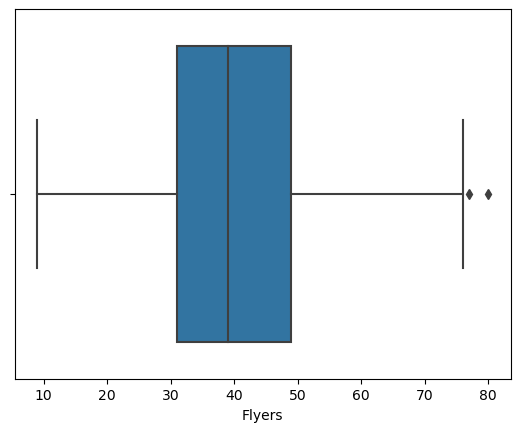

Spread of data for Price


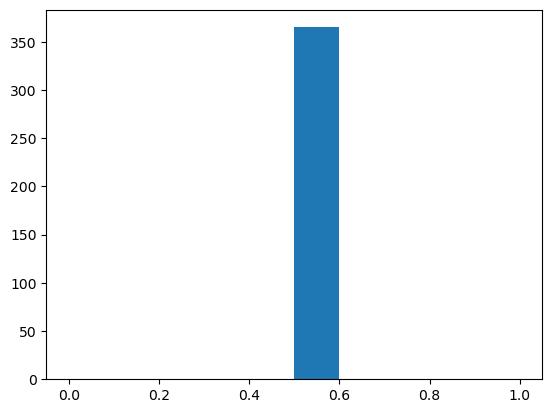

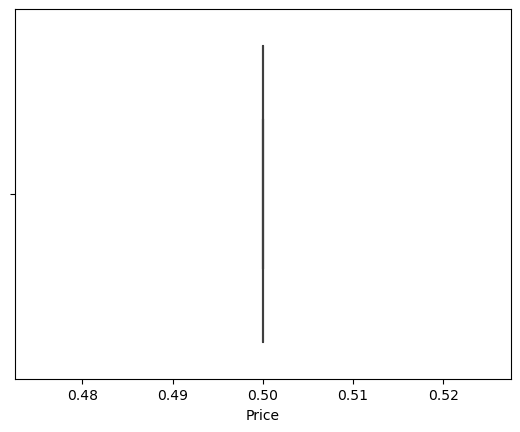

Spread of data for Sales


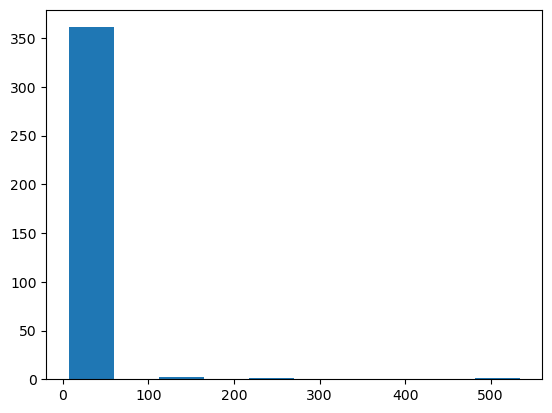

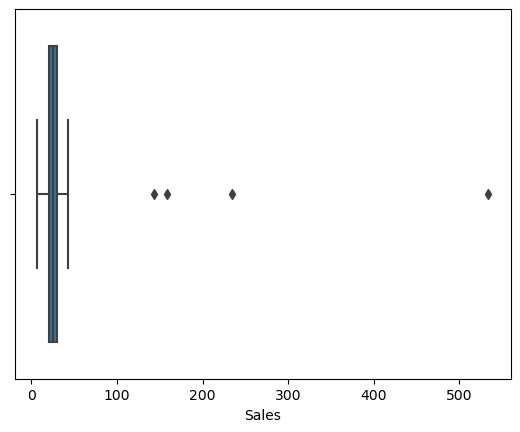

In [112]:
for col in lemonade_df.drop(columns=['month','Day']).columns:
    print(f'Spread of data for {col}')
    # make a histogram for each col
    plt.hist(df[col])
    plt.show()
    # make a box plot of each col
    sns.boxplot(data=lemonade_df, x=col)
    plt.show()
    print('===========')

In [ ]:
# what have we done?
# we have located instances of our data that appeared as aberrant
# or weird in some way.
# we defined these by IQR, domain context, and z-score
# we used critical thinking in order to impute and patch
# clerical errors in the data as well as gaining
# a sense of seasonality for both weather and sales


### 2.  Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

Use a 2 sigma decision rule to isolate the outliers.

Do these make sense?
Should certain outliers be kept or removed?



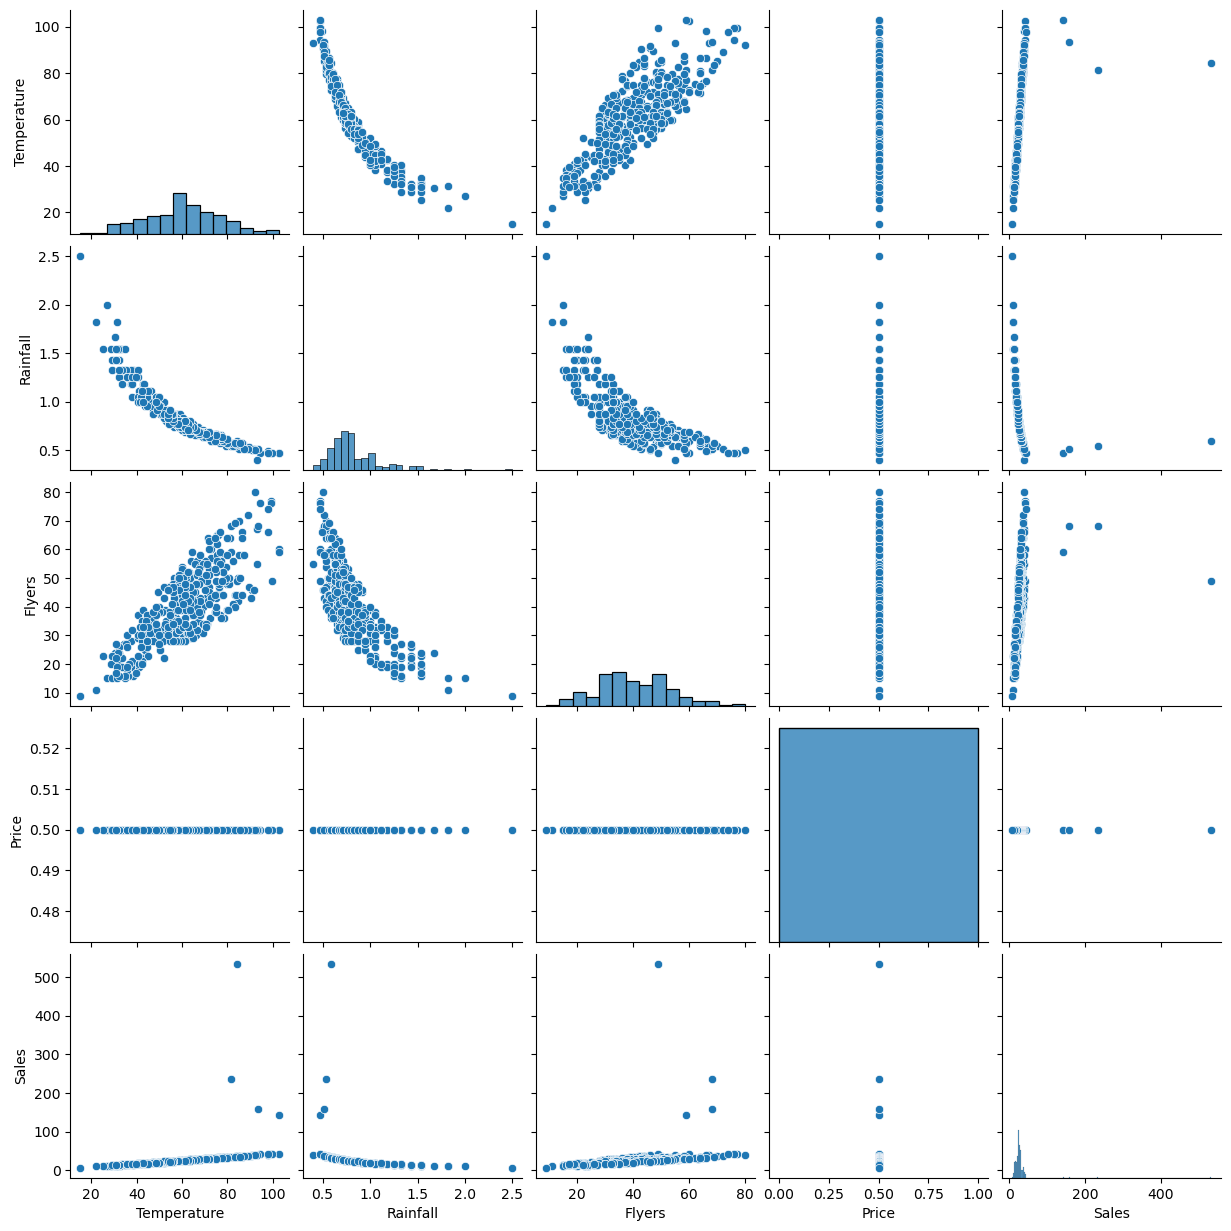

In [113]:
# lets also look at how the variables interact
sns.pairplot(lemonade_df)

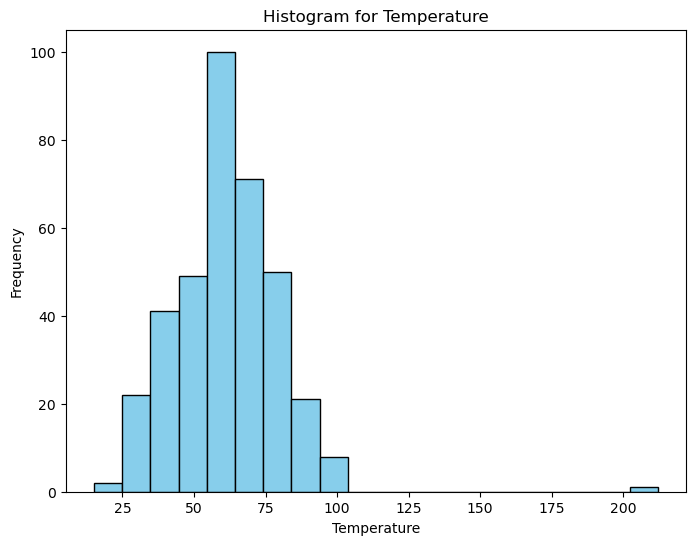

Temperature does not appear to be normally distributed (p-value=0.0000).


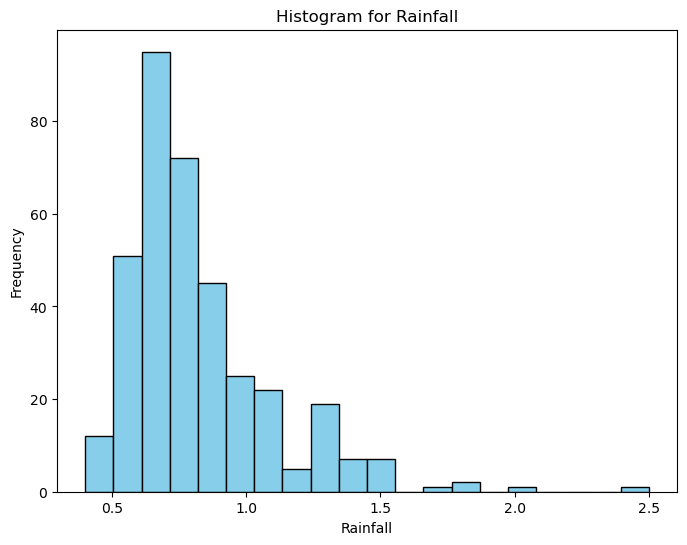

Rainfall does not appear to be normally distributed (p-value=0.0000).


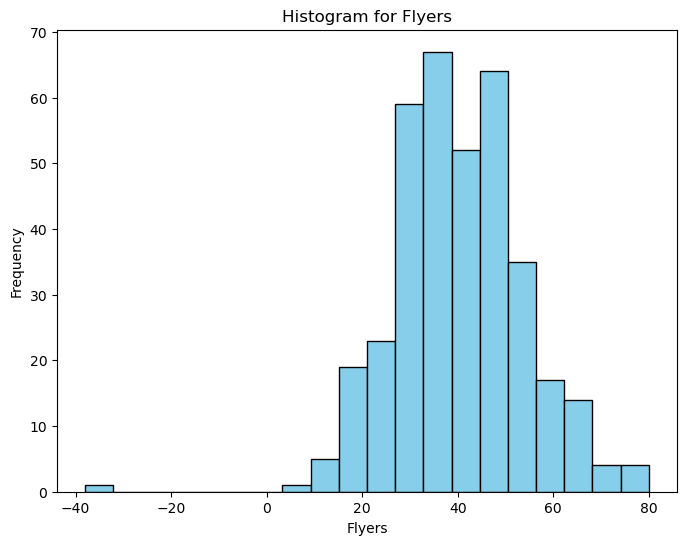

Flyers does not appear to be normally distributed (p-value=0.0000).


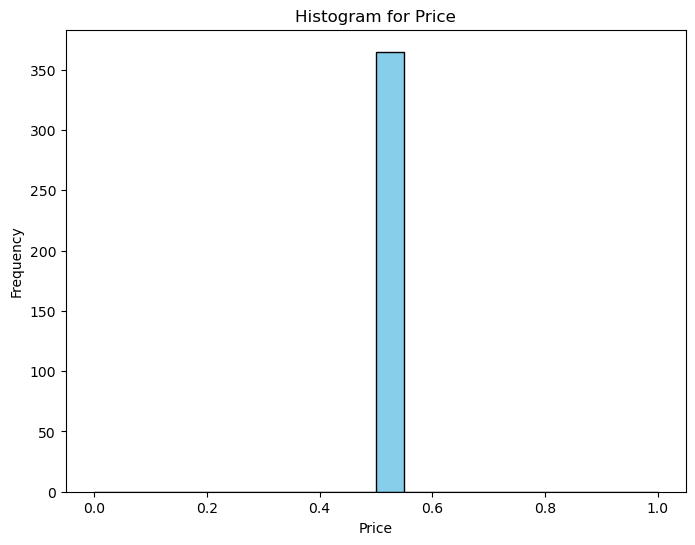

Price appears to be normally distributed (p-value=1.0000).
Potential outliers in Price:
Empty DataFrame
Columns: [Date, Day, Temperature, Rainfall, Flyers, Price, Sales]
Index: []


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


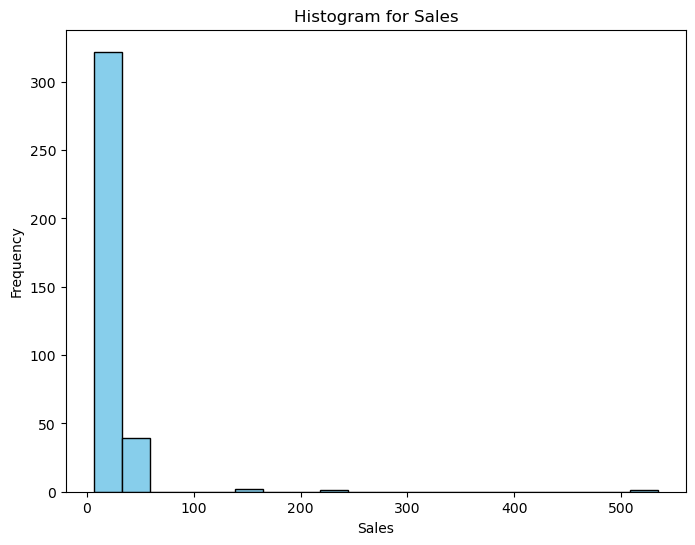

Sales does not appear to be normally distributed (p-value=0.0000).


In [36]:
# Filter only numeric columns
numeric_cols = lemonade_df.select_dtypes(include=['number'])

# Iterate through numeric columns and assess normality
for col in numeric_cols.columns:
    data = lemonade_df[col]
    
    # Visual inspection (histogram)
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    
    # Statistical test (Shapiro-Wilk)
    p_value = shapiro(data)[1]
    if p_value > 0.05:
        print(f'{col} appears to be normally distributed (p-value={p_value:.4f}).')
        
        # Calculate mean and standard deviation
        mean = np.mean(data)
        std_dev = np.std(data)
        
        # Define threshold for outliers (2 sigma)
        lower_bound = mean - 2 * std_dev
        upper_bound = mean + 2 * std_dev
        
        # Identify potential outliers
        outliers = lemonade_df[(data < lower_bound) | (data > upper_bound)]
        
        print(f'Potential outliers in {col}:')
        print(outliers)
        print('==========')
    else:
        print(f'{col} does not appear to be normally distributed (p-value={p_value:.4f}).')


### 3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [37]:
# Filter only numeric columns
numeric_cols = lemonade_df.select_dtypes(include=['number'])

# Define a function to identify outliers using a sigma rule
def identify_outliers(data, sigma=3):
    mean = np.mean(data)
    std_dev = np.std(data)
    
    lower_bound = mean - sigma * std_dev
    upper_bound = mean + sigma * std_dev
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Iterate through numeric columns and assess normality
for col in numeric_cols.columns:
    data = lemonade_df[col]
    
    # Statistical test (Shapiro-Wilk)
    p_value = shapiro(data)[1]
    if p_value > 0.05:
        print(f'{col} appears to be normally distributed (p-value={p_value:.4f}).')
        
        # Identify outliers using a 3 sigma rule
        outliers = identify_outliers(data, sigma=3)
        
        print(f'Outliers (3 Sigma Rule) in {col}:')
        print(outliers)
        print('==========')
    else:
        print(f'{col} does not appear to be normally distributed (p-value={p_value:.4f}).')


Temperature does not appear to be normally distributed (p-value=0.0000).
Rainfall does not appear to be normally distributed (p-value=0.0000).
Flyers does not appear to be normally distributed (p-value=0.0000).
Price appears to be normally distributed (p-value=1.0000).
Outliers (3 Sigma Rule) in Price:
Series([], Name: Price, dtype: float64)
Sales does not appear to be normally distributed (p-value=0.0000).


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1813: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Notes:-
When using a 3 sigma (standard deviation) decision rule to identify outliers, we are setting a more stringent threshold compared to a 2 sigma rule. This means that fewer data points will be classified as outliers because the threshold for what constitutes an outlier is farther from the mean.

2 Sigma Rule: Data points more than 2 standard deviations away from the mean are considered outliers.
3 Sigma Rule: Data points more than 3 standard deviations away from the mean are considered outliers.
The 3 sigma rule identifies extreme values that are further from the mean, so it tends to result in fewer outliers. It is a more conservative approach for identifying outliers, which can be appropriate when one wants to be very strict in flagging extreme values.

Using a 3 sigma rule will generally result in a smaller set of identified outliers, and these outliers are typically considered more extreme or unusual compared to those identified using a 2 sigma rule. However, the choice of sigma value should align with the context of the analysis and the level of sensitivity to outliers that is appropriate for the goals.